In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = '/content/drive/MyDrive/UTKFace/'

In [ ]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
# Create Data frame from path, age and gender
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/UTKFace/34_0_4_20170117...,34,0
1,/content/drive/MyDrive/UTKFace/26_0_1_20170113...,26,0
2,/content/drive/MyDrive/UTKFace/45_0_1_20170113...,45,0
3,/content/drive/MyDrive/UTKFace/11_1_0_20170109...,11,1
4,/content/drive/MyDrive/UTKFace/53_1_0_20170110...,53,1


In [ ]:
# Format of images - age_gender_serialno(not required)
gender_dict = {0:'Male', 1:'Female'}

Age:  34


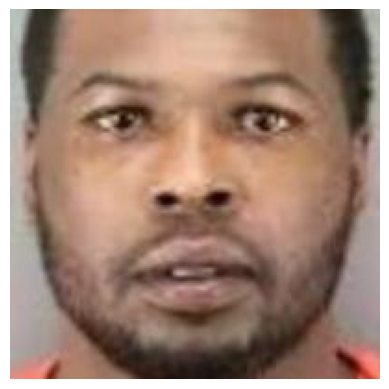

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
print("Age: ",df['age'][0])
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

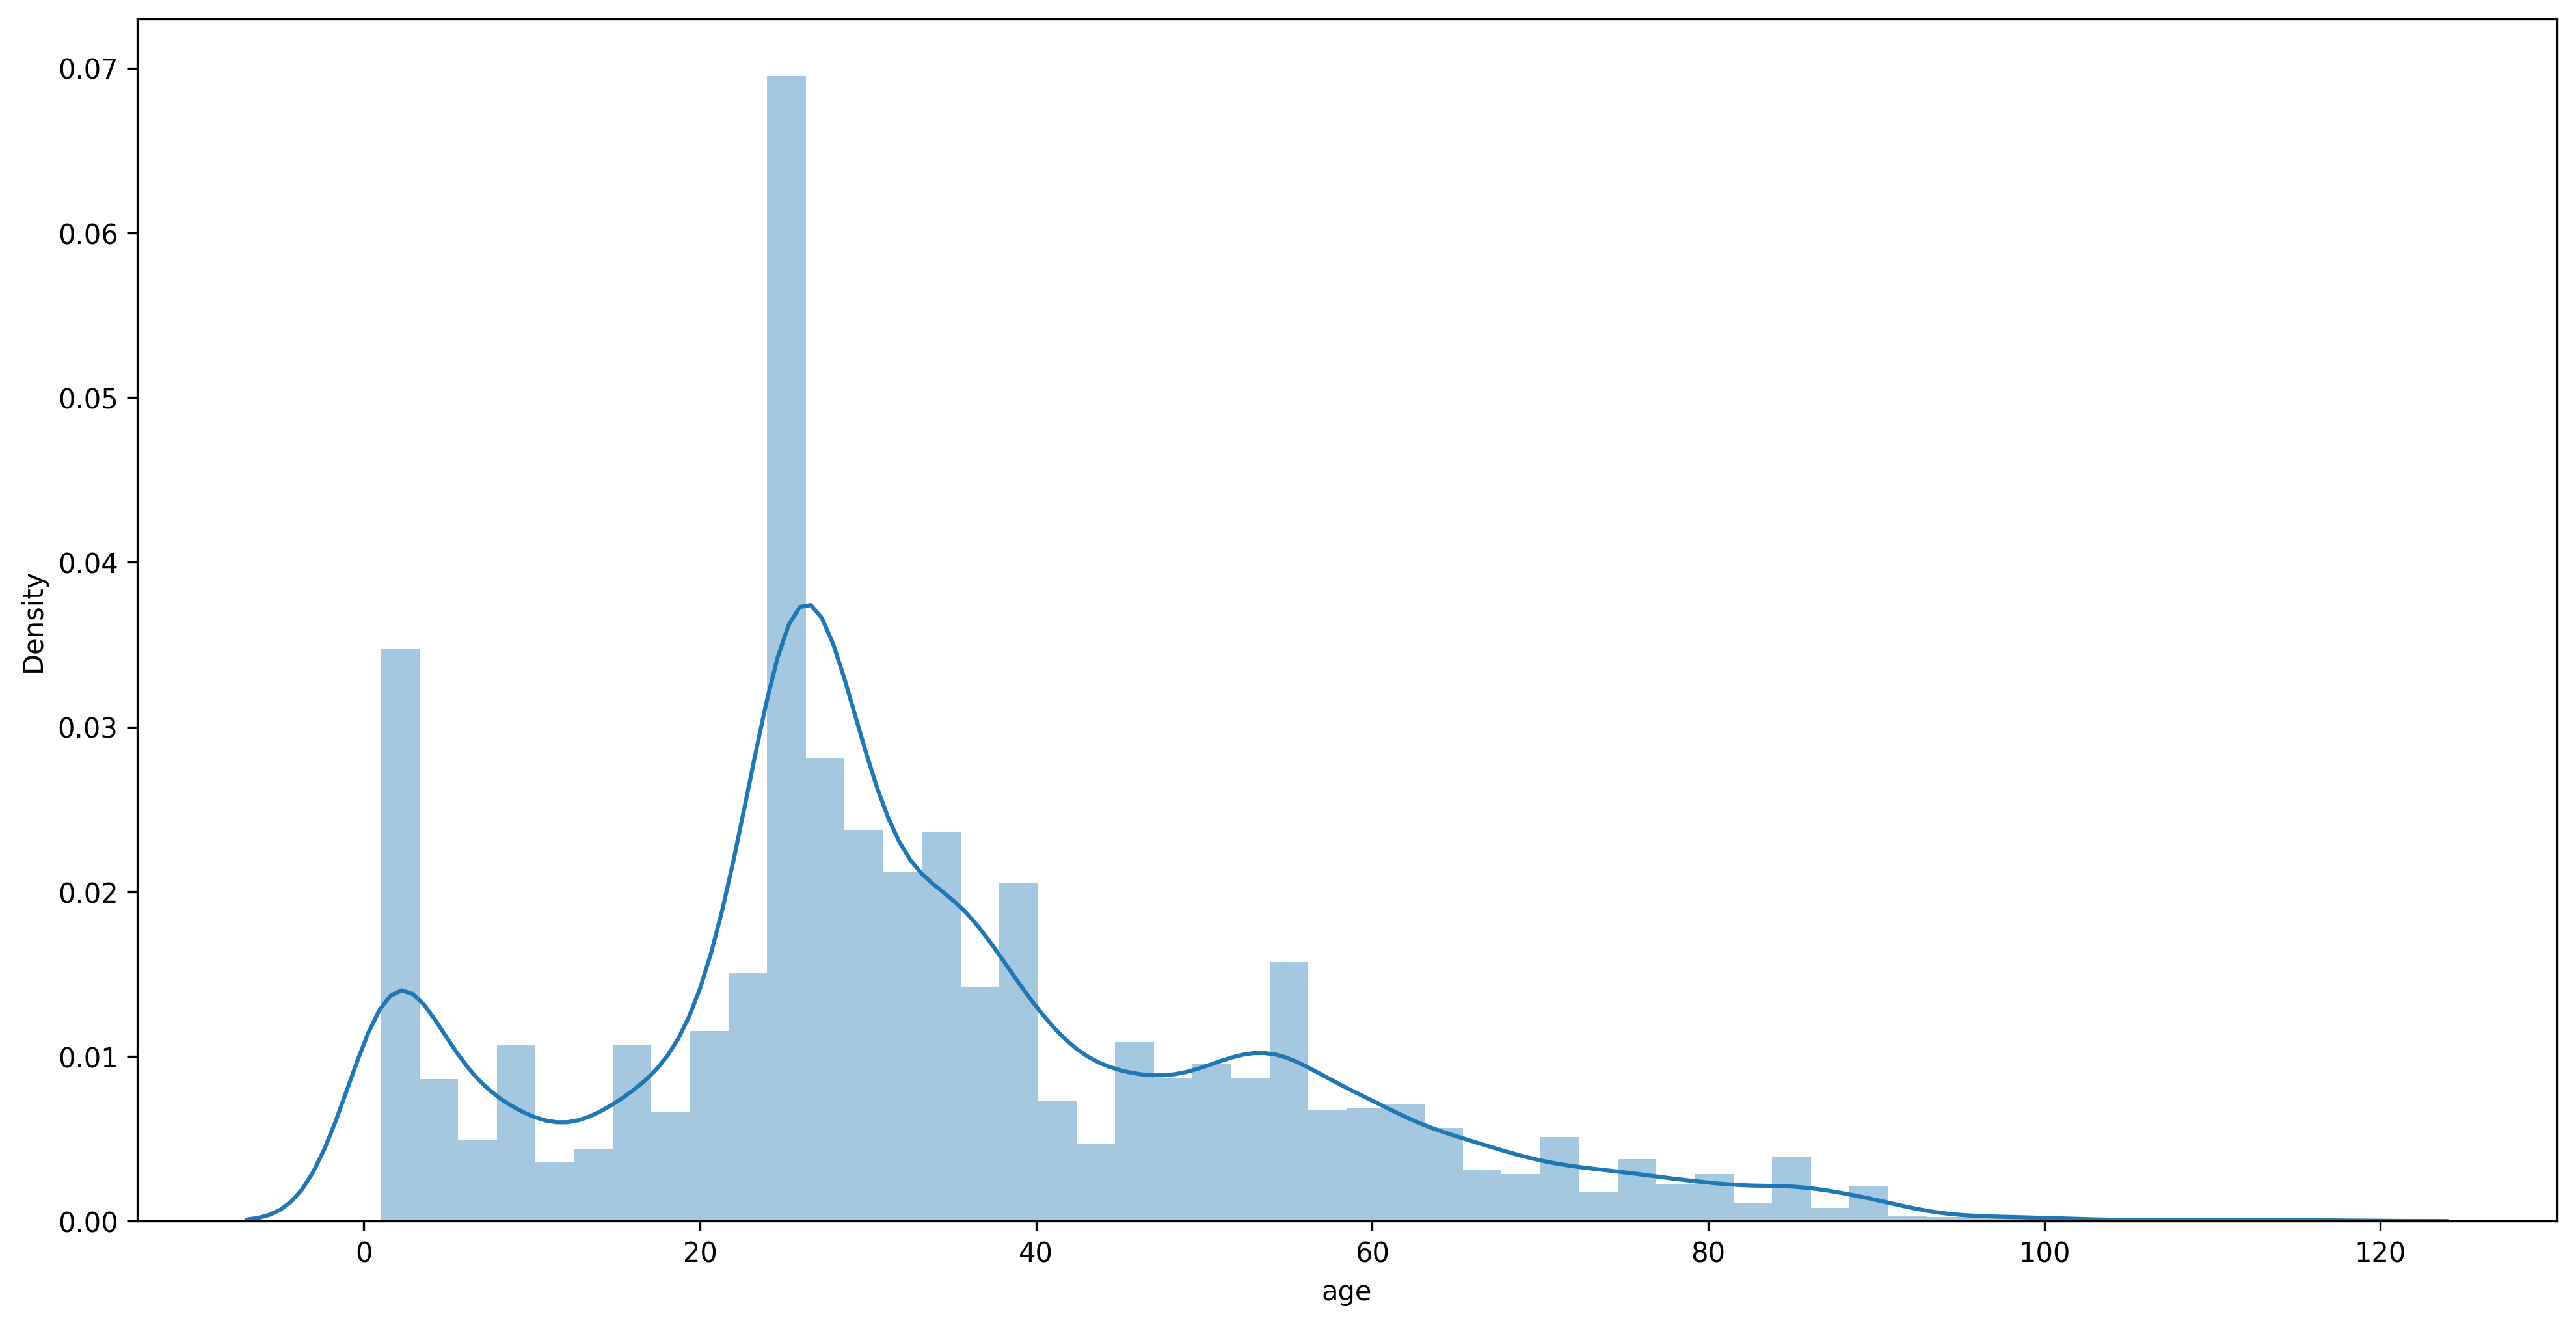

In [ ]:
plt.figure(figsize = (16, 8), dpi = 300)
sns.distplot(df['age'], kde = True)

<Axes: xlabel='gender', ylabel='count'>

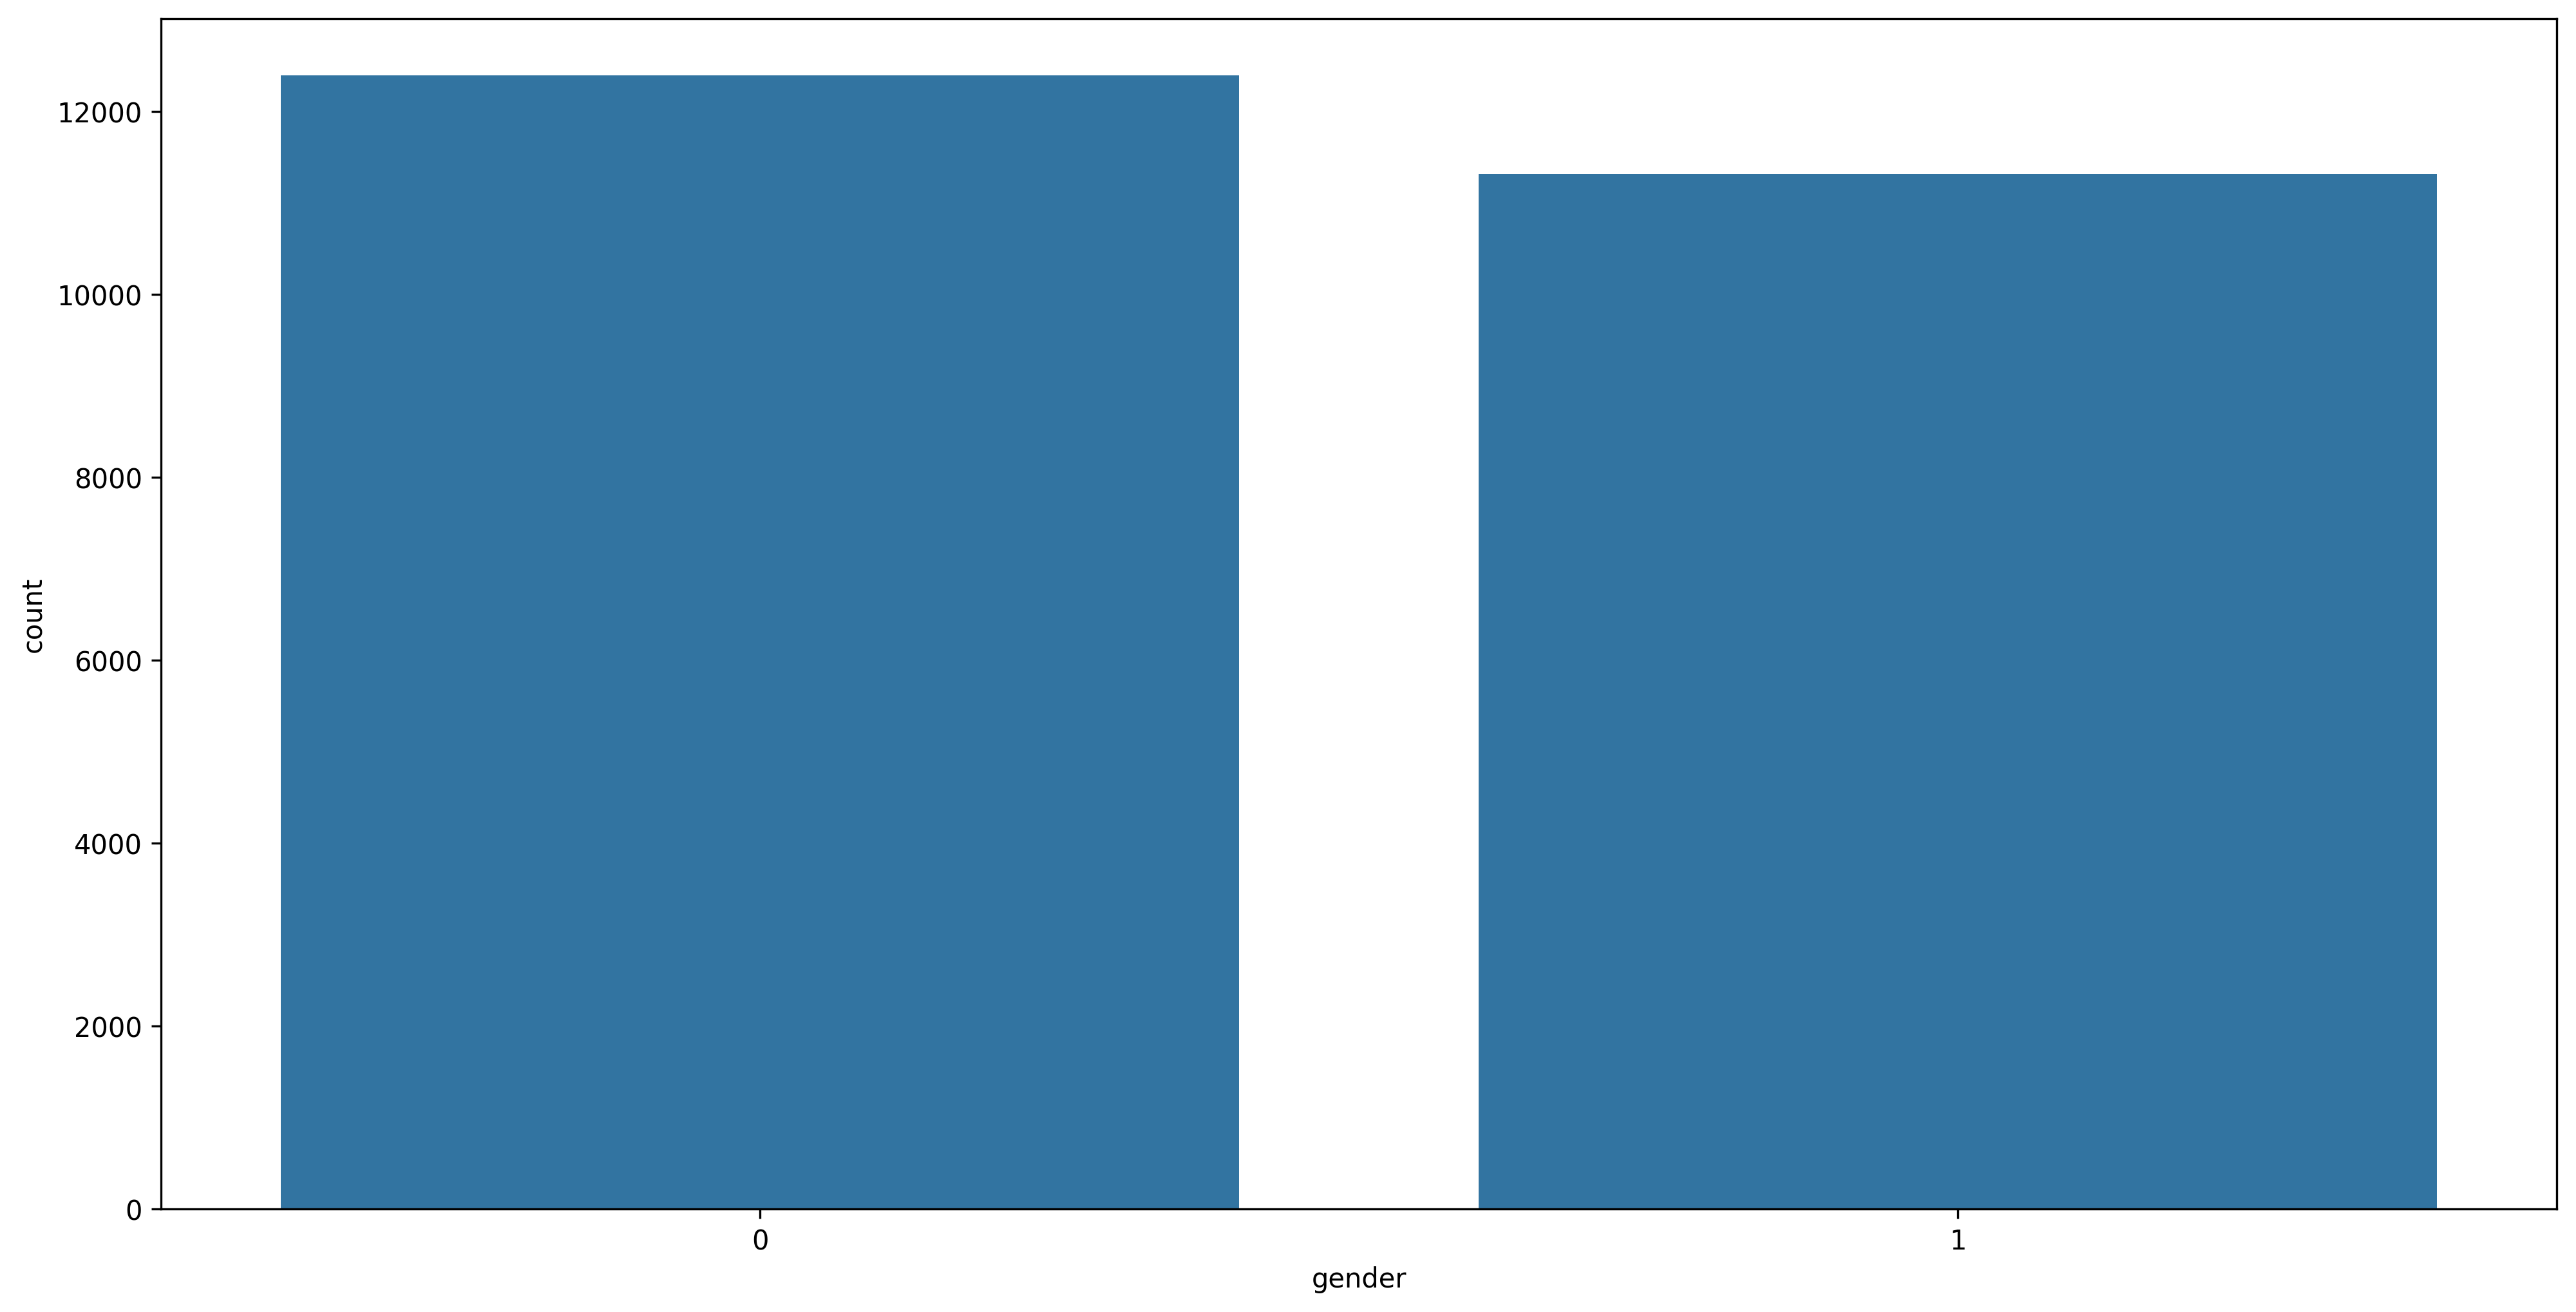

In [ ]:
plt.figure(figsize = (16, 8), dpi = 300)
sns.countplot(x = df['gender'])

In [ ]:
df['gender'].value_counts()

,count
gender,
0,12391
1,11317


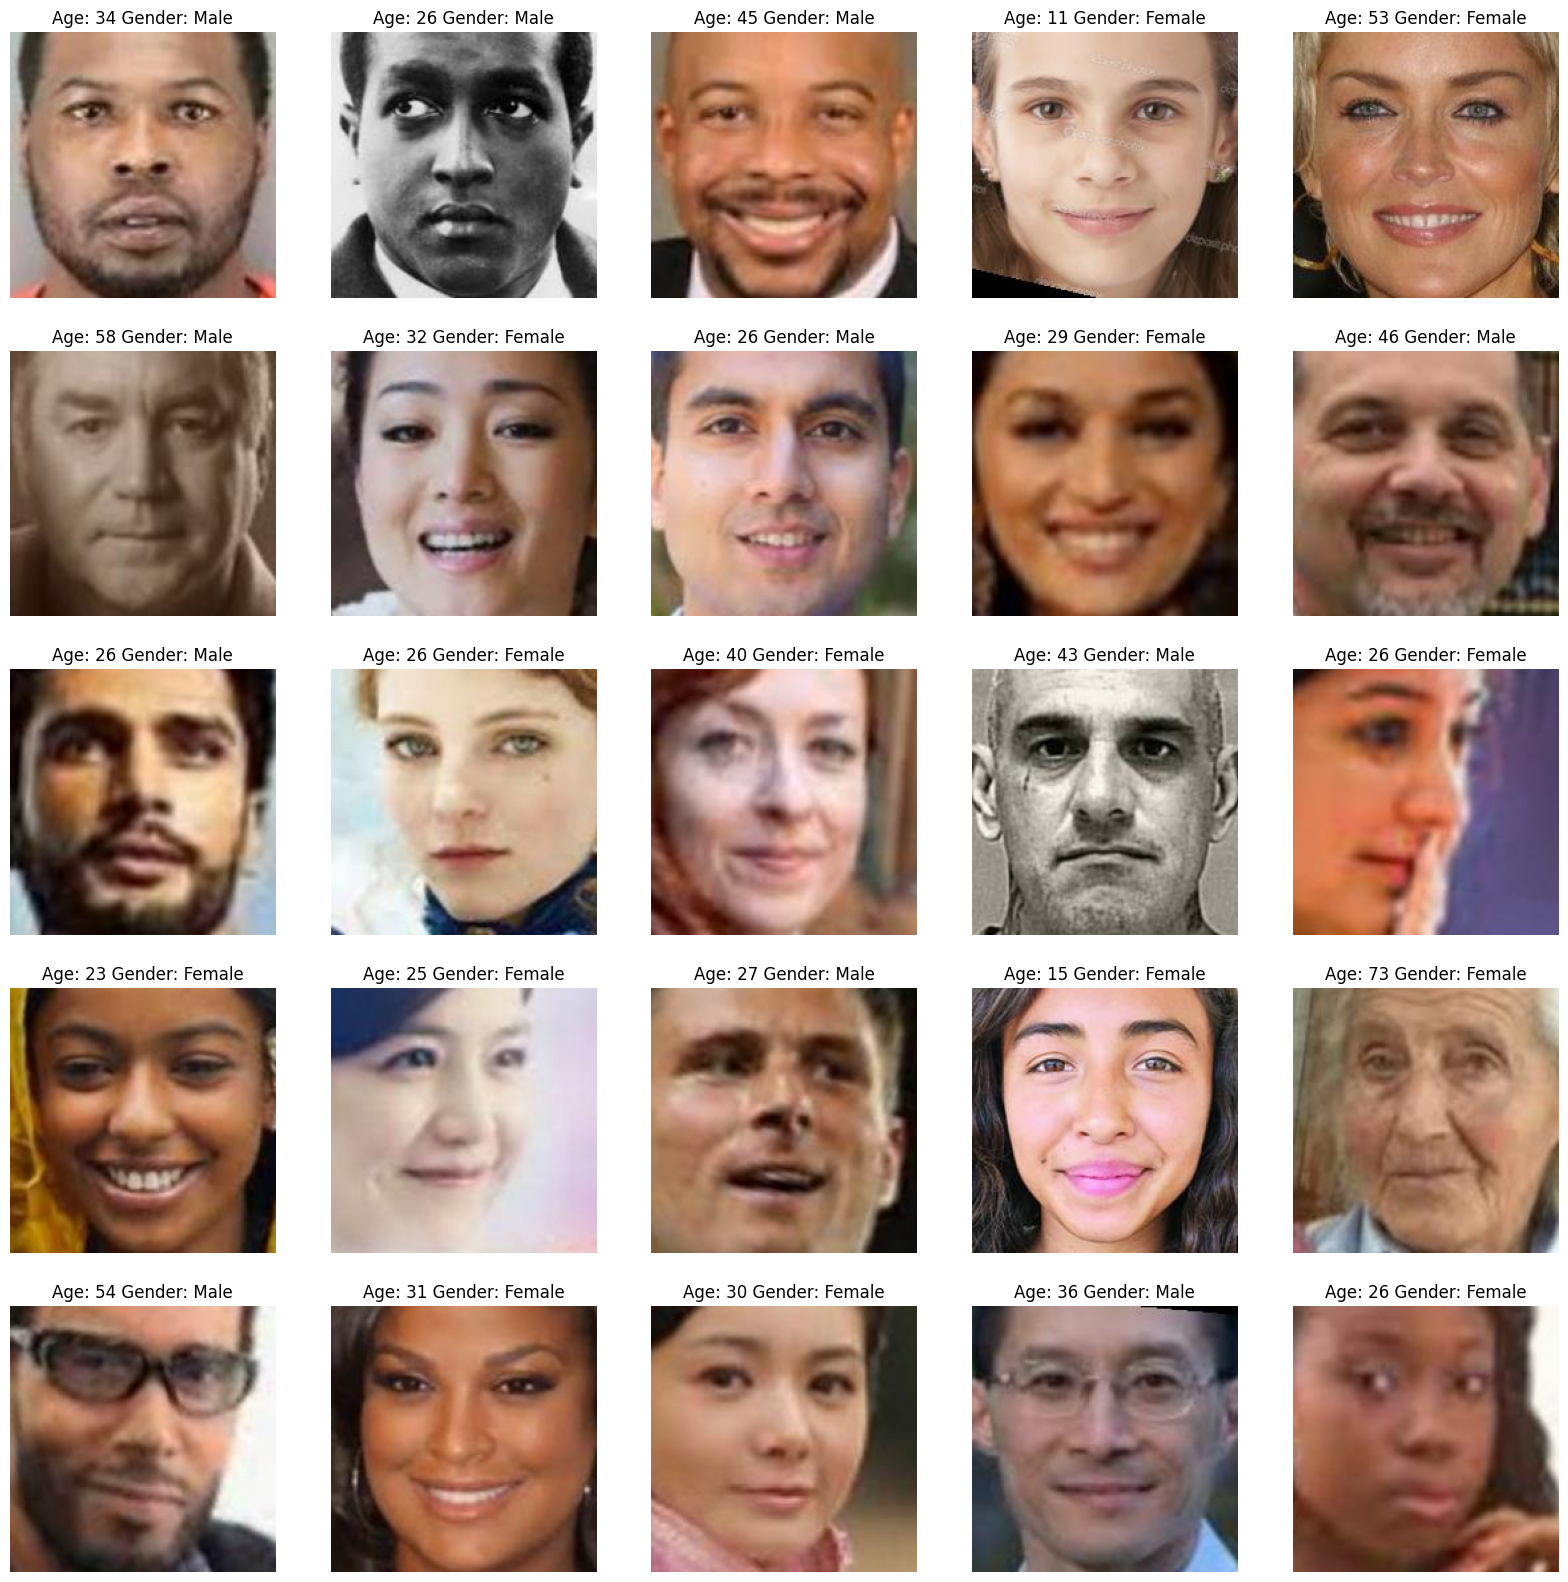

In [ ]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from PIL import Image

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        # Replace Image.ANTIALIAS with Image.Resampling.LANCZOS
        img = img.resize((128, 128), Image.Resampling.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # grayscaling hence keep no of channels to 1, incase of RGB it is 3
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_features(df['image'])
X.shape

100%|██████████| 23708/23708 [01:25<00:00, 275.94it/s]


(23708, 128, 128, 1)

In [ ]:
X = X / 255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

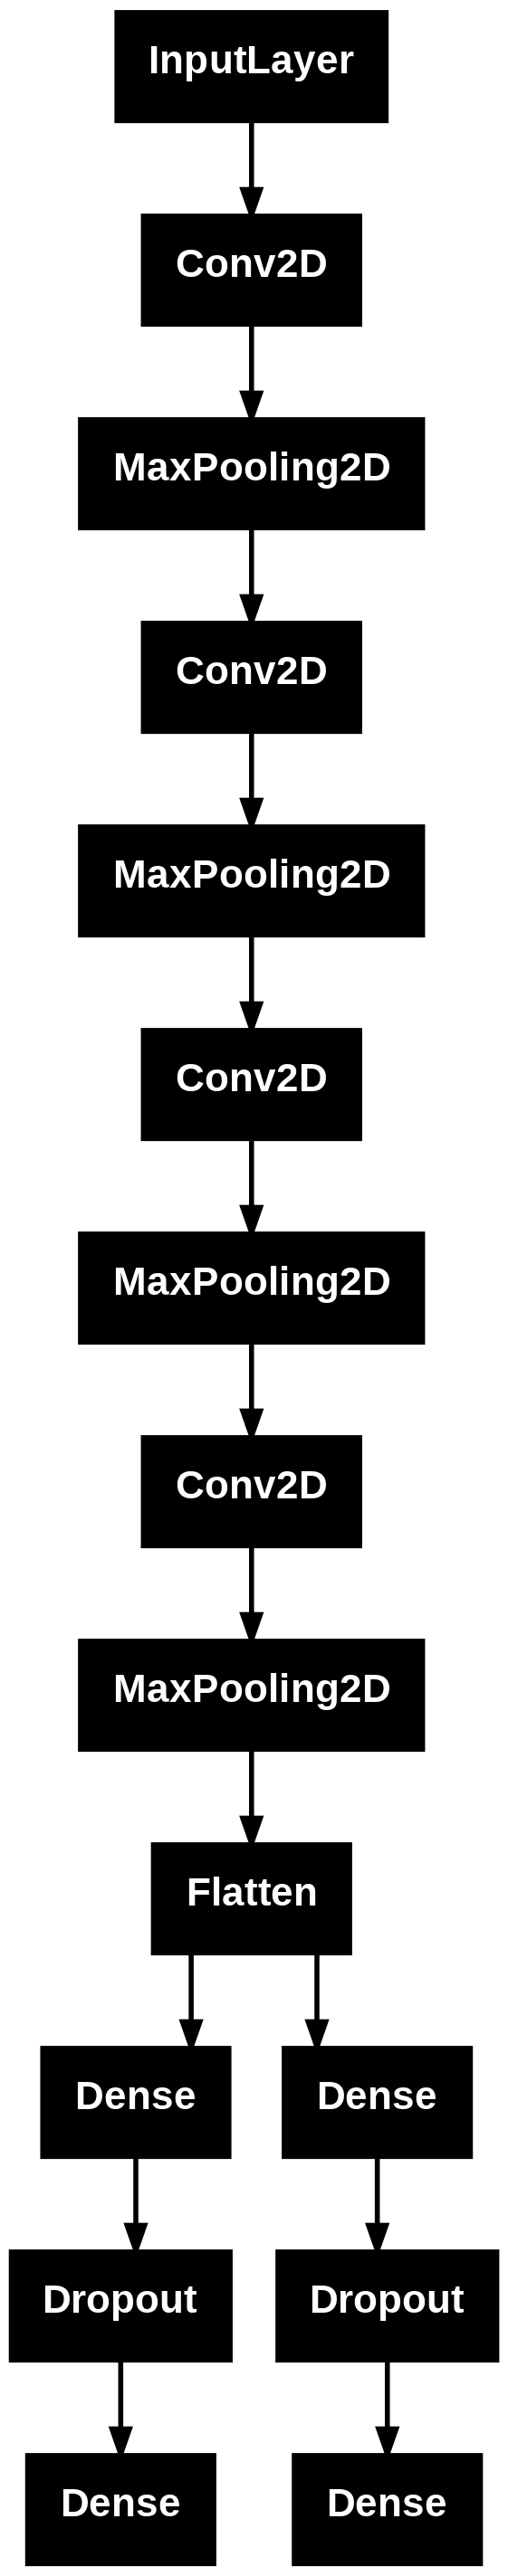

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - age_out_loss: 16.3696 - age_out_mae: 16.3696 - gender_out_accuracy: 0.5376 - gender_out_loss: 0.7139 - loss: 17.0835 - val_age_out_loss: 11.9880 - val_age_out_mae: 12.0203 - val_gender_out_accuracy: 0.7501 - val_gender_out_loss: 0.5104 - val_loss: 12.5308
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - age_out_loss: 11.5175 - age_out_mae: 11.5175 - gender_out_accuracy: 0.7624 - gender_out_loss: 0.4995 - loss: 12.0171 - val_age_out_loss: 10.2149 - val_age_out_mae: 10.2448 - val_gender_out_accuracy: 0.8001 - val_gender_out_loss: 0.4275 - val_loss: 10.6721
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - age_out_loss: 9.8985 - age_out_mae: 9.8985 - gender_out_accuracy: 0.8008 - gender_out_loss: 0.4285 - loss: 10.3270 - val_age_out_loss: 9.1124 - val_age_out_mae: 9.1278 - val_gender_out_accuracy: 0.8220 - val_gender_out_loss: 0.3843 - val_loss: 9.5118
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - age_out_loss:

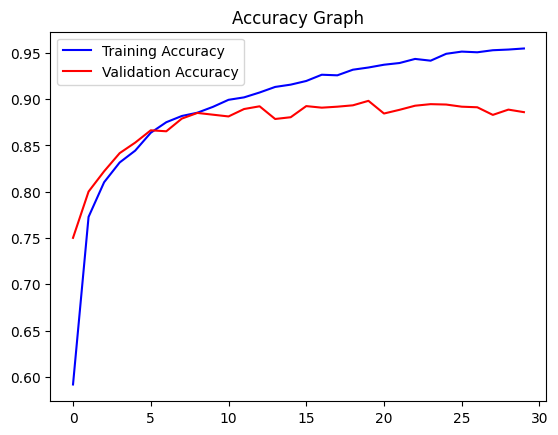

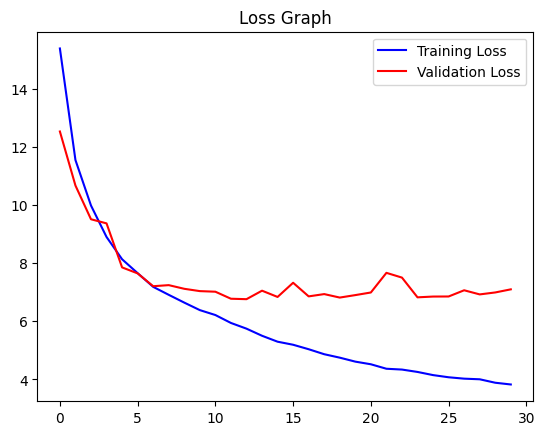

In [ ]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

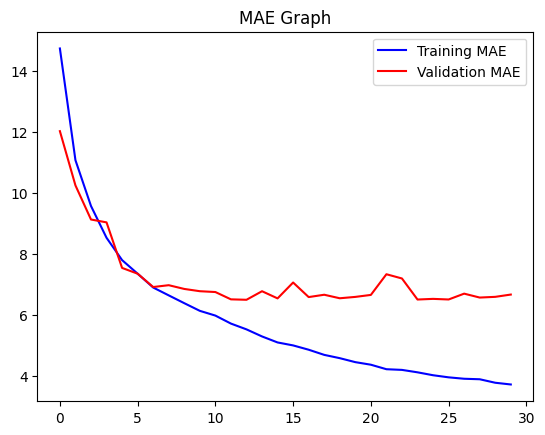

In [ ]:
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
Predicted Gender: Male Predicted Age: 38


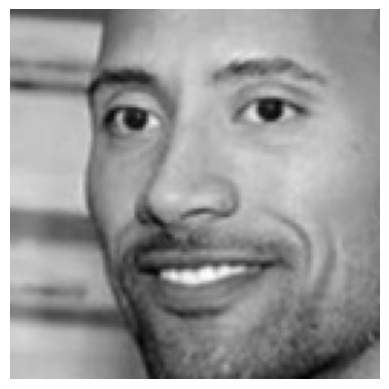

Original Gender: Male Original Age: 37
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Gender: Male Predicted Age: 37


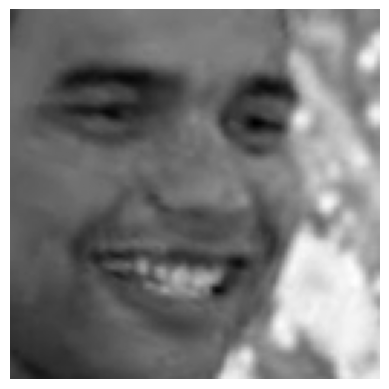

Original Gender: Female Original Age: 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Gender: Female Predicted Age: 68


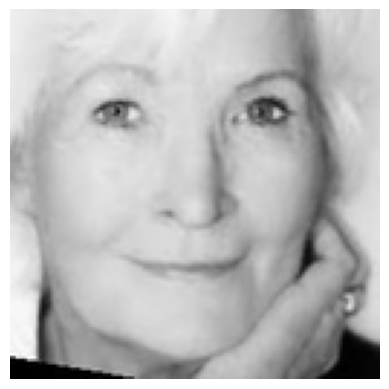

Original Gender: Female Original Age: 26
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Gender: Female Predicted Age: 31


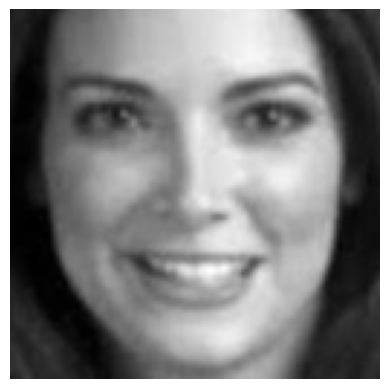

Original Gender: Male Original Age: 57
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Gender: Male Predicted Age: 57


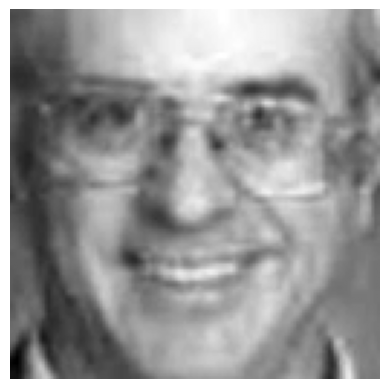

In [ ]:
import random

# Generate 5 random indices within the bounds of the dataset
num_images_to_predict = 5
image_indices = random.sample(range(X.shape[0]), num_images_to_predict)

# Iterate through the selected indices and make predictions
for image_index in image_indices:
    print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
    # predict from model
    pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
    plt.axis('off')
    plt.imshow(X[image_index].reshape(128, 128), cmap='gray')
    plt.show()  # Display each image separately

In [ ]:
from keras.models import load_model
model.save('age_gender_model.h5')

In [ ]:
destination_path = '/content/drive/MyDrive/age_gender_model.h5'  # Adjust the path as needed

# Copy the file to your Drive
shutil.copy('age_gender_model.h5', destination_path)

'/content/drive/MyDrive/age_gender_model.h5'